In [1]:
import sys
import numpy as np

sys.path.append("../src");


In [2]:
import PythonMlTools.FeatureSelection.Metrics.FeatureInformation as FI

InfA=FI.InformationAnalysis([1,2,3,3,4],[-1,-1,-1,-1,2],2,2)
print(InfA.MutualInformation())
print(InfA.JointEntropy())
print(InfA.EntropyA())
print(InfA.EntropyB())

print(InfA.Pab)
InfB=FI.InformationAnalysis(InfA.Pab)
print(InfB.MutualInformation())
print(InfB.JointEntropy())
print(InfB.EntropyA())
print(InfB.EntropyB())

0.17095059445466854
1.5219280948873621
0.9709505944546686
0.7219280948873623
[[0.4 0. ]
 [0.4 0.2]]
0.17095059445466845
1.5219280948873621
0.9709505944546686
0.7219280948873623


In [3]:
import PythonMlTools.DensityEstimation.KdeExtras as kext
from sklearn.neighbors import KernelDensity

XX=[[1,2],[2,3],[-1,2],[2,1],[3,3],[2,3]];
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(XX)
P=kext.kde_get2d_joint_prob(kde, -1,3,3,1,3,3)

print(P)

[[0.02942515 0.21742407 0.02942516]
 [0.05886019 0.22937672 0.08833849]
 [0.0295178  0.04143097 0.27620146]]


[[5.82690097e+01 3.74984449e-02 8.59840556e-03 ... 2.17001484e-01
  3.22933765e+03 1.80047527e-02]
 [6.82598039e+01 4.13635497e-02 9.37149698e-03 ... 2.01791430e-01
  3.22940732e+03 1.92269456e-02]
 [4.87539647e+01 4.06827584e-02 8.88084788e-03 ... 1.87221224e-01
  3.22947230e+03 1.87653675e-02]
 ...
 [5.60635882e+01 3.69506095e-02 6.09088429e-03 ... 1.71034733e-01
  3.23060579e+03 3.18102935e-02]
 [4.90922401e+01 4.04129478e-02 5.75523063e-03 ... 1.60464381e-01
  3.23065079e+03 3.79515266e-02]
 [8.33483348e+01 2.90308433e-02 6.83432609e-03 ... 1.65652026e-01
  3.23071677e+03 4.27784018e-02]]
[[0.99922734 0.457337   0.2908525  0.321156   0.16010623 0.60341261
  0.22010021 0.43847776 0.21311112 0.21144792 0.43032624 0.20834939
  0.24776413 0.26327812 0.25272317]
 [0.457337   0.99945075 0.24816962 0.45633236 0.17423598 0.57891554
  0.27998776 0.52738074 0.3394834  0.16916111 0.46103068 0.27651375
  0.3161218  0.24812544 0.20182801]
 [0.2908525  0.24816962 0.999983   0.27975673 0.26452816

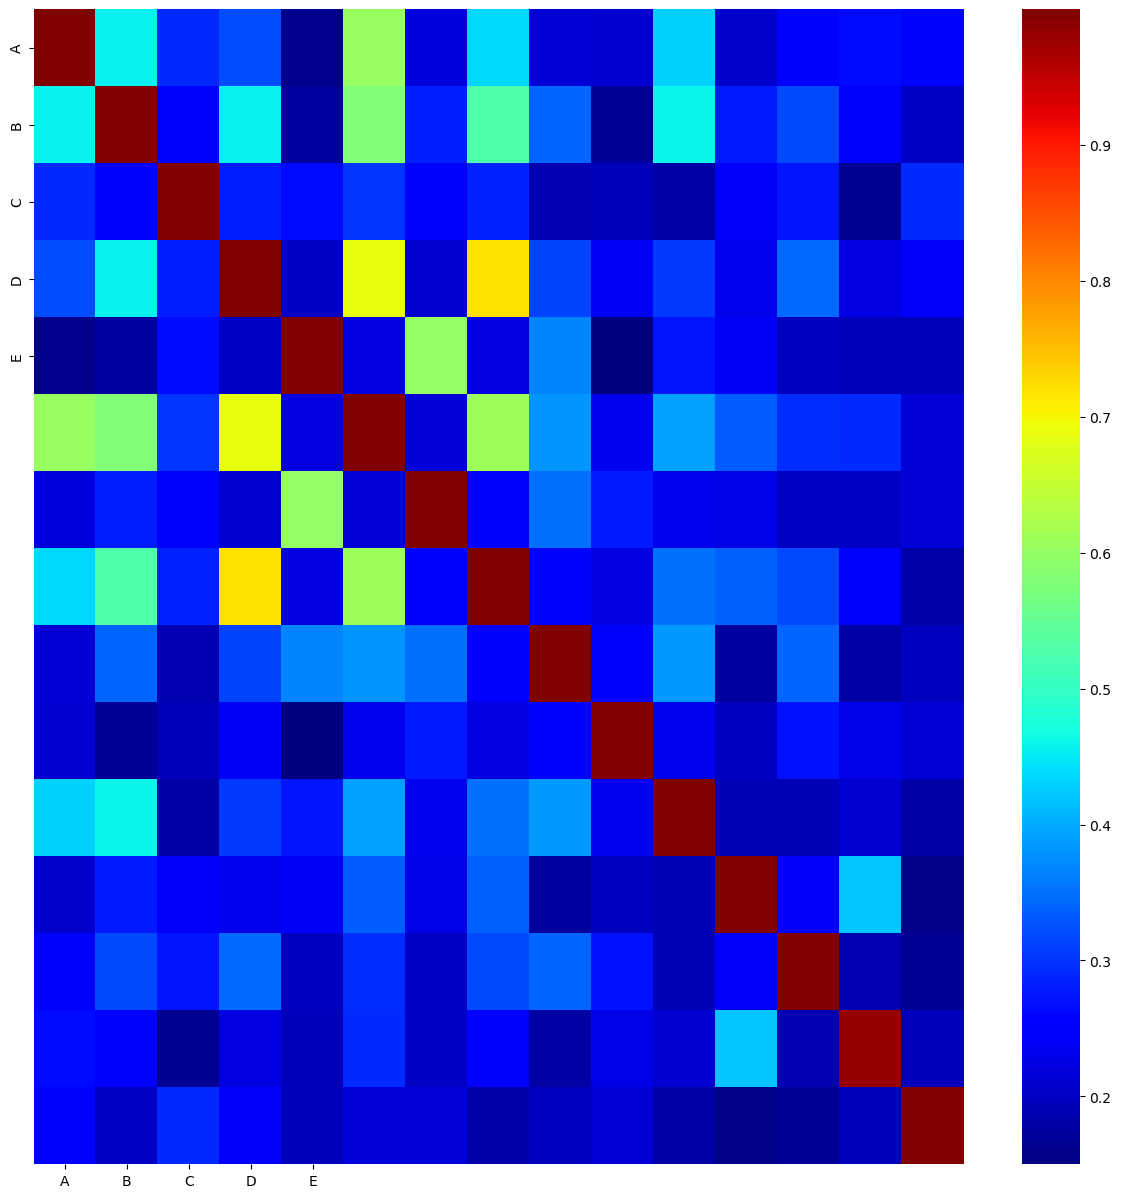

In [4]:
import PythonMlTools.FeatureSelection.Analysis.Information as AnI
import seaborn as sns
import matplotlib.pyplot as plt

DATA_COLUMNS=['A','B','C','D','E']
X=np.load('data-test.npy');
print(X)

mat=AnI.all_against_all_mutual_inf(X,bandwidth=0.08,bins=10);
print(mat)

fig = plt.figure(figsize=(15, 15)) # width and height in inches
sns.heatmap(mat,xticklabels=DATA_COLUMNS, yticklabels=DATA_COLUMNS,cmap='jet')
plt.show()
fig.savefig('all_against_all.png')
